### 1. Importing libraries and data
### 2. Data cleaning
### 3. Data prep for regression analysis
### 4. Regression analysis
### 5. Bonus: performance improvement after removing outliers
### 6. Exporting Data 

## 1. Importing libraries and data

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
import statsmodels.api as sm
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = 'C:/Users/ajkap/Final Achievement'

In [4]:
#Imported insurance_checked.csv
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'insurance_clean.csv'), index_col = False)

## 2. Data Cleaning

In [5]:
## Data cleaning
df.columns

Index(['Unnamed: 0', 'age', 'sex', 'bmi', 'children', 'smoker', 'region',
       'insurance_charges'],
      dtype='object')

In [6]:
#remove unamed column
df = df.drop(columns = ['Unnamed: 0'])

In [7]:
df.head(20)

,age,sex,bmi,children,smoker,region,insurance_charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [8]:
#check shape
df.shape

(1337, 7)

In [9]:
#check statistics
df.describe()

,age,bmi,children,insurance_charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [10]:
# Check for missing values

df.isnull().sum()

# No missing values to handle

age                  0
sex                  0
bmi                  0
children             0
smoker               0
region               0
insurance_charges    0
dtype: int64

In [11]:
dups = df.duplicated()

In [12]:
dups.shape # No duplicates

(1337,)

## check for extreme values

<Axes: xlabel='insurance_charges', ylabel='Count'>

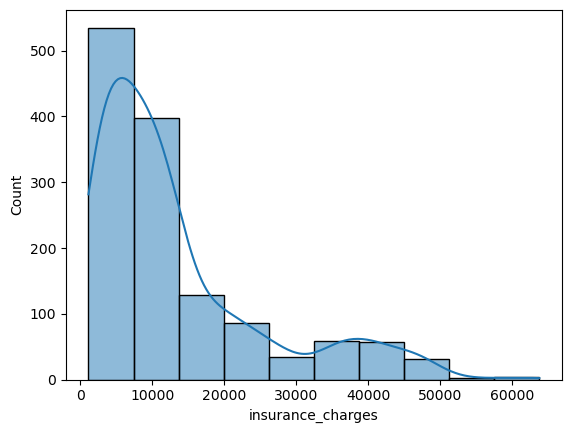

In [70]:
#Check for extreme values
sns.histplot(df['insurance_charges'], bins=10, kde = True) #There are some extreme values but I am leaving them for now

<Axes: xlabel='age', ylabel='Count'>

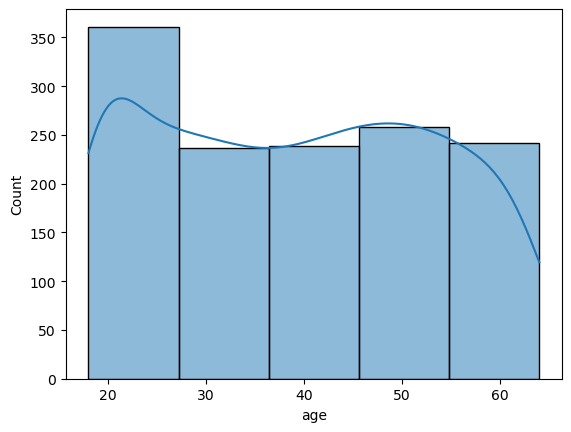

In [14]:
#Check for extreme values
sns.histplot(df['age'], bins=5, kde = True)

In [15]:
df['age'].mean() # Check the mean

39.222139117427076

In [16]:
df['age'].median() # Check the median

39.0

In [17]:
df['age'].min() # Check the min

18

In [18]:
df['age'].max() # Check the max

64

In [19]:
df['insurance_charges'].mean() #check mean

13279.121486655948

In [20]:
df['insurance_charges'].median() #check median

9386.1613

In [21]:
df['insurance_charges'].min() #check min

1121.8739

In [22]:
df['insurance_charges'].max() #check max

63770.42801

In [68]:
df['insurance_charges'].std()

12110.359656344179

## 3. Data prep for regression analysis 

### Hypothesis: The older someone is the higher their insurance charges will be. 

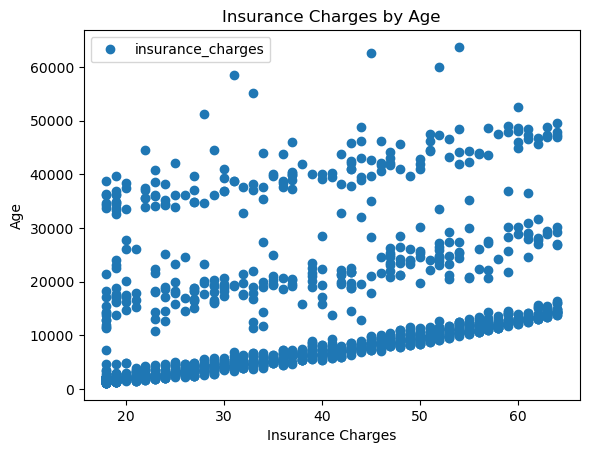

In [23]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other
df.plot(x = 'age', y='insurance_charges',style='o') 
plt.title('Insurance Charges by Age')  
plt.xlabel('Insurance Charges')  
plt.ylabel('Age')  
plt.show()

In [24]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['age'].values.reshape(-1,1)
y = df['insurance_charges'].values.reshape(-1,1)       

In [25]:
X

array([[19],
       [18],
       [28],
       ...,
       [18],
       [21],
       [61]], dtype=int64)

In [26]:
y

array([[16884.924 ],
       [ 1725.5523],
       [ 4449.462 ],
       ...,
       [ 1629.8335],
       [ 2007.945 ],
       [29141.3603]])

In [27]:
# Split data into a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Grouping by Age

In [89]:
df['age'].describe()

count    1337.000000
mean       39.222139
std        14.044333
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [103]:
# Create segment for younger aged
df.loc[df['age'] < 25, 'age_category'] = 'younger_aged'

In [104]:
#Create segment for middle aged
df.loc[(df['age'] >=25) & (df['age'] < 35), 'age_category']= 'middle_aged'

In [105]:
#Create segment for older aged
df.loc[(df['age'] >=35) & (df['age'] < 50), 'age_category']= 'older_aged'

In [106]:
#Create segment for older aged
df.loc[(df['age'] >=50) & (df['age'] <= 64), 'age_category']= 'geriatric_aged'

In [107]:
#check new segments
df['age_category'].value_counts(dropna = False)

older_aged        404
geriatric_aged    385
younger_aged      277
middle_aged       271
Name: age_category, dtype: int64

<Axes: xlabel='age_category', ylabel='insurance_charges'>

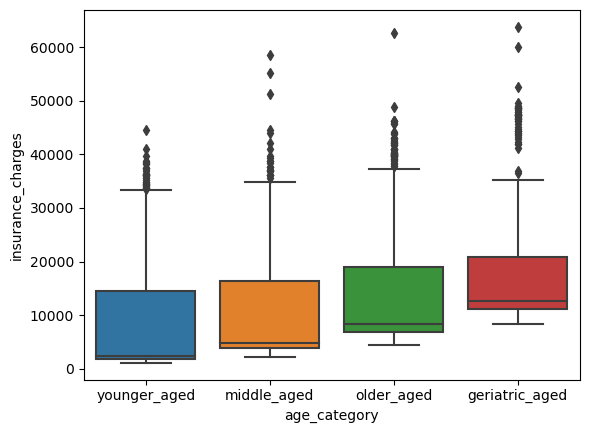

In [121]:
# Creating plot
sns.boxplot(data=df, x='age_category', y='insurance_charges')

<Axes: xlabel='age', ylabel='insurance_charges'>

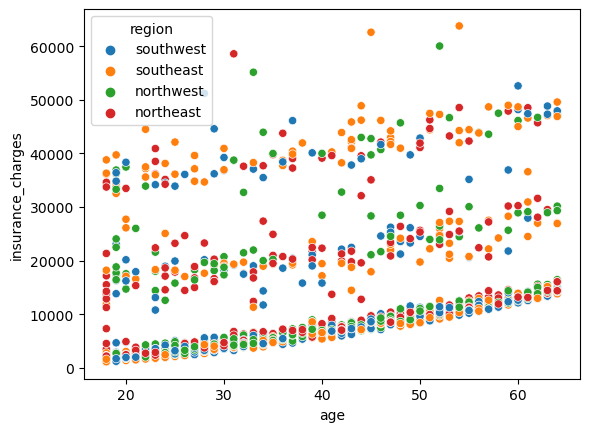

In [136]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other
sns.scatterplot(df, x='age', y='insurance_charges', hue='region')

<Axes: xlabel='age', ylabel='insurance_charges'>

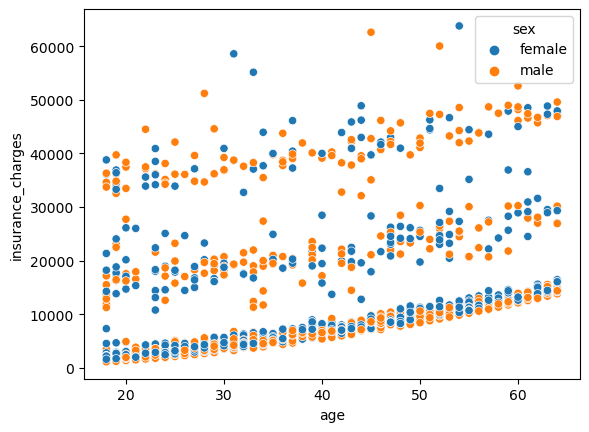

In [138]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other
sns.scatterplot(df, x='age', y='insurance_charges', hue='sex')

<Axes: xlabel='age', ylabel='insurance_charges'>

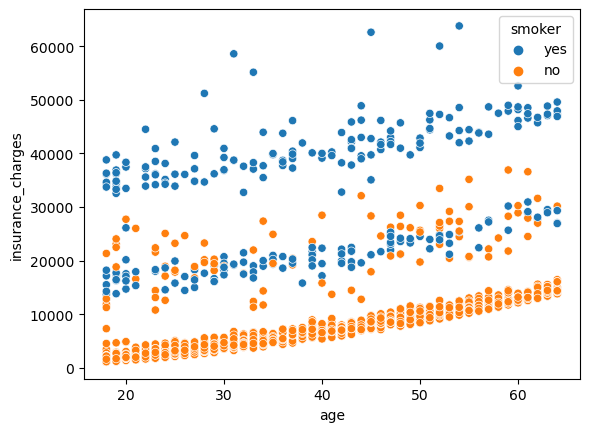

In [139]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other
sns.scatterplot(df, x='age', y='insurance_charges', hue='smoker')

<Axes: xlabel='age', ylabel='insurance_charges'>

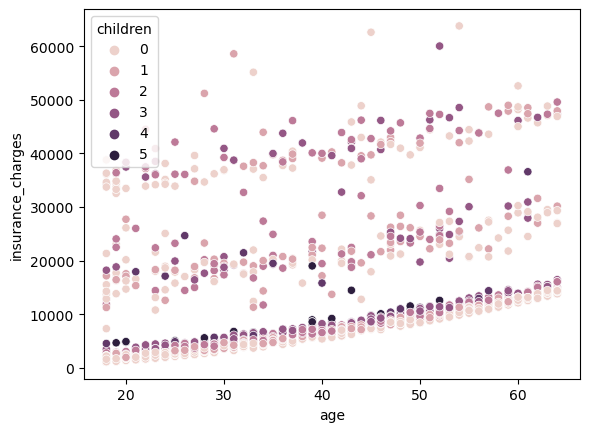

In [141]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other
sns.scatterplot(df, x='age', y='insurance_charges', hue='children')

## 4. Regression Analysis

In [28]:
# Create a regression object.
regression = LinearRegression()

In [29]:
# Fit the regression object onto the training set.
regression.fit(X_train, y_train)

LinearRegression()

In [30]:
# Predict the values of y using X.
y_predicted = regression.predict(X_test)

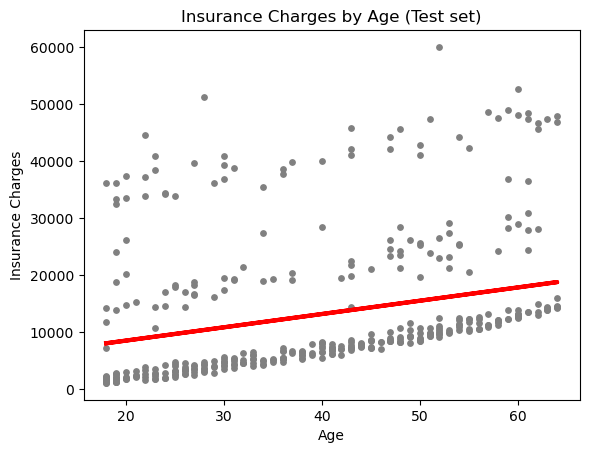

In [31]:
# Create a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Insurance Charges by Age (Test set)')
plot_test.xlabel('Age')
plot_test.ylabel('Insurance Charges')
plot_test.show()

In [32]:
# Create objects that contain the model summary statistics.
rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted) 

In [33]:
# Print the model summary statistics. Evaluating performance of model
print('Slope:',regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[233.02389044]]
Mean squared error:  146173303.34737504
R2 score:  0.10739068301367438


### The regression line does not appear to fit the insurance data very well. Most of the data points are far away from the regression line. The mean squared error is also very high at 435129 which indicates this model is likely not a good fit. 

In [34]:
y_predicted

array([[ 8086.24297948],
       [14843.9358021 ],
       [15309.98358297],
       [ 8319.26686991],
       [15776.03136384],
       [ 9950.43410296],
       [ 8086.24297948],
       [ 8319.26686991],
       [ 8319.26686991],
       [17407.19859688],
       [15076.95969253],
       [ 9950.43410296],
       [18572.31804906],
       [14144.86413079],
       [12280.67300731],
       [ 9251.36243165],
       [12280.67300731],
       [ 9950.43410296],
       [12746.72078818],
       [18805.34193949],
       [ 8086.24297948],
       [17873.24637775],
       [ 8319.26686991],
       [ 9018.33854122],
       [ 9018.33854122],
       [11348.57744557],
       [10416.48188383],
       [15309.98358297],
       [11115.55355513],
       [ 8552.29076035],
       [13212.76856905],
       [15776.03136384],
       [16941.15081601],
       [16708.12692558],
       [ 9484.38632209],
       [18106.27026819],
       [14610.91191166],
       [10416.48188383],
       [14843.9358021 ],
       [ 8552.29076035],


In [35]:
# Create a dataframe comparing the actual and predicted values of y.
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,1633.96180,8086.242979
1,8547.69130,14843.935802
2,9290.13950,15309.983583
3,32548.34050,8319.266870
4,9644.25250,15776.031364
5,2680.94930,9950.434103
6,2198.18985,8086.242979
7,1241.56500,8319.266870
8,2710.82855,8319.266870
9,12235.83920,17407.198597


### Compare how the regression fits the training set 

In [36]:
# Predict X_train
y_predicted_train = regression.predict(X_train) 

In [37]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [38]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[233.02389044]]
Mean squared error:  128318059.75747487
R2 score:  0.07682646420531725


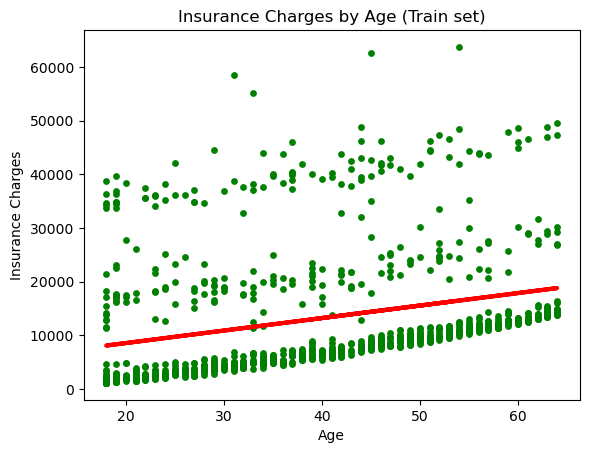

In [39]:
# Visualize the training set results.
plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Insurance Charges by Age (Train set)')
plot_test.xlabel('Age')
plot_test.ylabel('Insurance Charges')
plot_test.show()

## The model did not seem to perform well for the insurance data. The data points were very far away from the regression line and the model seemed to do a poor job in confirming the hypothesis the older someone is, the more their insurance charges will be. The R2 score was also very low at .0768 which also confirms this model being a poor fit. 

## Bonus: performance improvement after removing outliers

In [122]:
# Clean the extreme values from the "insurance_charges" variable observed during the consistency checks.
df_test = df[df['insurance_charges'] <=50000] 

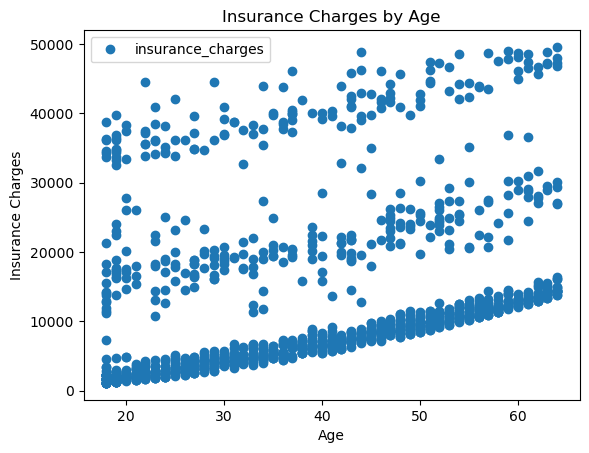

In [123]:
# Display scatterplot without outliers.
df_test.plot(x = 'age', y='insurance_charges', style='o')  
plt.title('Insurance Charges by Age')  
plt.xlabel('Age')  
plt.ylabel('Insurance Charges')  
plt.show()

In [124]:
# Reshape again.
X_2 = df_test['age'].values.reshape(-1,1)
y_2 = df_test['insurance_charges'].values.reshape(-1,1)

In [125]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [126]:
# Run and fit the regression.
regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [127]:
# Predict.
y_predicted_2 = regression.predict(X_test_2)

In [128]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [129]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[208.3334831]]
Mean squared error:  128928640.68278472
R2 score:  0.1396662520542723


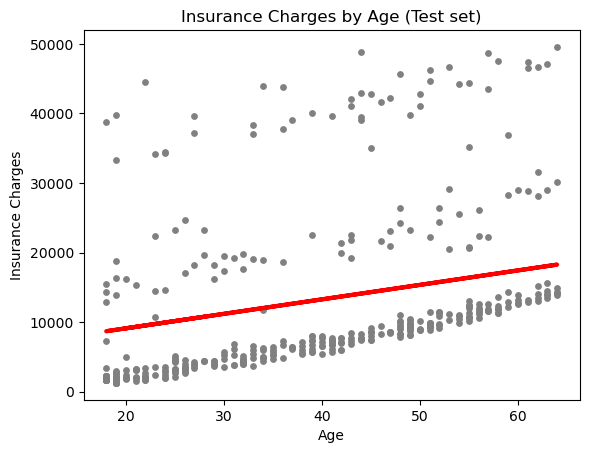

In [130]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='gray', s = 15)
plot_test.plot(X_test_2, y_predicted_2, color='red', linewidth =3)
plot_test.title('Insurance Charges by Age (Test set)')
plot_test.xlabel('Age')
plot_test.ylabel('Insurance Charges')
plot_test.show()

In [131]:
data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data.head(30)

,Actual,Predicted
0,1964.78000,9094.940868
1,12730.99960,17428.280192
2,7682.67000,13261.610530
3,44260.74990,16178.279293
4,4889.03680,12428.276597
5,19964.74630,13678.277496
6,1708.00140,8678.273902
7,14210.53595,18261.614124
8,35160.13457,16386.612776
9,20781.48892,16386.612776


## Removing the outliers of insurance_charges over $50000 did seem to make the model a bit more accurate. However, this could make the model biased since it decreases the number of data points in an already smaller dataset. While I do not think this insurance dataset is biased, there might be a chance it was collected with some bias. For instance, maybe whoever collected the data only wanted to include people under the age of 65. They might have assumed no one over that age is still on commercial insurance which may not be true since people are working well into their 60s in the current economy. 

## Exporting Data

In [132]:
#check shape before export
df.shape

(1337, 8)

In [133]:
#export file
df.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'Insurance_regression.pkl'))